In [ ]:

import os
import cv2

# from lovon package
from lovon.lovon_agent import LovonAgent
# from rosmaster_lib
import time
from rosmaster_lib import Rosmaster
from ipywidgets import interact
import ipywidgets as widgets
# Camera
from lovon.camera_rosmaster import Rosmaster_Camera

/home/jetson/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
# 创建机器人跟随控制对象 
current_dir = '/home/jetson/hw_nav/lovon'
vlm_models_folder = os.path.join(current_dir, 'models_cxn_025')
lovon_agent = LovonAgent()
# lovon_agent = LovonAgent(
#     yolo_model_dir=os.path.join(current_dir, "yolo-models/yolo11x.pt"),
#     tokenizer_path=os.path.join(vlm_models_folder, "tokenizer_language2motion_n1000000"),
#     object_extraction_model_path=os.path.join(vlm_models_folder, "model_object_extraction_n1000000_d64_h4_l2_f256_msl64_hold_success"),
#     language2motion_model_path=os.path.join(vlm_models_folder, "model_language2motion_n1000000_d256_h8_l4_f1024_msl64_hold_success_cxn025")
# )


In [3]:
# 创建Rosmaster对象 bot Create the Rosmaster object bot
bot = Rosmaster()
# 启动接收数据，只能启动一次，所有读取数据的功能都是基于此方法
# Start to receive data, can only start once, all read data function is based on this method
bot.create_receive_threading()
# 开启自动发送数据
# enable=True，底层扩展板会每隔40毫秒发送一次数据。enable=False，则不发送。
# forever=True永久保存，=False临时作用。
# Enable automatic data sending
# If enable=True, the underlying expansion module sends data every 40 milliseconds.  If enable=False, the port is not sent.
# Forever =True for permanent, =False for temporary
enable = True
bot.set_auto_report_state(enable, forever=False)


Rosmaster Serial Opened! Baudrate=115200
----------------create receive threading--------------


In [4]:
# 控制电机运动 Control motor movement
def car_motion(V_x, V_y, V_z):
    speed_x= V_x / 10.0
    speed_y = V_y / 10.0
    speed_z = V_z / 10.0
    bot.set_car_motion(speed_x, speed_y, speed_z)
    print(f"Set car motion: V_x={speed_x} m/s, V_y={speed_y} m/s, V_z={speed_z} rad/s")
    return speed_x, speed_y, speed_z


# 创建三个滑块来控制小车的速度 Create three sliders to control the speed of the car
interact(car_motion, \
         V_x=widgets.IntSlider(min=-10,max=10,step=1,value=0), \
         V_y=widgets.IntSlider(min=-10,max=10,step=1,value=0), \
         V_z=widgets.IntSlider(min=-50,max=50,step=1,value=0))

interactive(children=(IntSlider(value=0, description='V_x', max=10, min=-10), IntSlider(value=0, description='…

<function __main__.car_motion(V_x, V_y, V_z)>

In [5]:
# Example usage:
# 读取图像
image = cv2.imread("lovon/chair.png")
# 运行 LOVON Agent
state, motion_vector = lovon_agent.run(image=image, mission_instruction_0="run to the chair at speed of 0.4 m/s", mission_instruction_1="run to the person at speed of 0.4 m/s")
print(state)
print(motion_vector)  
state, motion_vector = lovon_agent.run(image=image, mission_instruction_0="run to the chair at speed of 0.4 m/s", mission_instruction_1="run to the person at speed of 0.4 m/s")
print(state)
print(motion_vector)  

{'predicted_object': 'NULL', 'confidence': [0.0], 'object_xyn': [0.0, 0.0], 'object_whn': [0.0, 0.0], 'mission_state_in': 'searching_1', 'search_state_in': 'had_searching_1'}
[0.4, 0.0, 1.03]
{'predicted_object': 'NULL', 'confidence': [0.0], 'object_xyn': [0.0, 0.0], 'object_whn': [0.0, 0.0], 'mission_state_in': 'searching_1', 'search_state_in': 'had_searching_1'}
[-0.01, 0.0, 0.31]


In [5]:

camera = Rosmaster_Camera(debug=False)
success, frame = camera.get_frame()
print("Camera frame success:", success)

[ WARN:0@109.264] global cap_gstreamer.cpp:1777 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1
[ WARN:0@109.265] global cap_gstreamer.cpp:2152 setProperty OpenCV | GStreamer warning: GStreamer: unhandled property


Camera frame success: True


In [6]:
# 获取50次图像，统计成功次数和失败次数
num_tests = 50
success_count = 0
failure_count = 0
for _ in range(num_tests):
    success, frame = camera.get_frame()
    if success:
        success_count += 1
    else:
        failure_count += 1
success_rate = (success_count / num_tests) * 100
print(f"Image Capture Success Rate: {success_rate}% ({success_count} successes, {failure_count} failures)")

Image Capture Success Rate: 100.0% (50 successes, 0 failures)


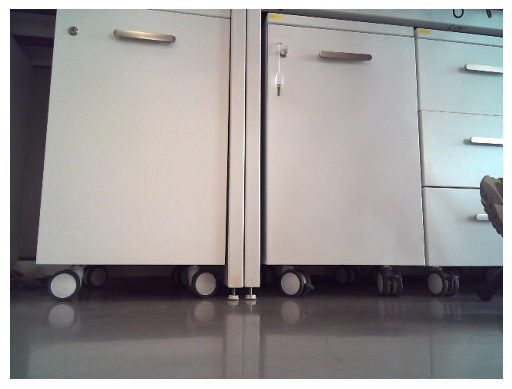

In [3]:
# 绘制图像使用 matplotlib
import matplotlib.pyplot as plt

if success:
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
else:
    print("Failed to capture image from camera.")